<a href="https://www.kaggle.com/code/karenzhang0701/student-alcohol-consumption-eda?scriptVersionId=103147755" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Student Alcohol Consumption - EDA & Models

I wanted to explore 2 main questions:

**1. What are the strongest factors that influence student grades?**

**2. What trends can be seen in student alcohol consumption?**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-alcohol-consumption/student-mat.csv
/kaggle/input/student-alcohol-consumption/student-merge.R
/kaggle/input/student-alcohol-consumption/student-por.csv


# Data Processing & Visualization

In [2]:
path = '../input/student-alcohol-consumption/student-por.csv'
df = pd.read_csv(path)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [6]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [7]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

<AxesSubplot:>

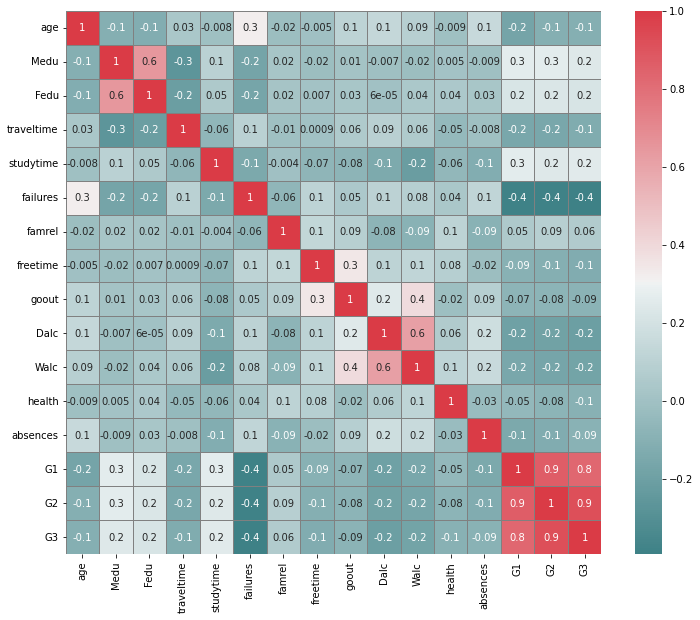

In [8]:
# correlation heatmap
corr = df.corr()
fig, ax = plt.subplots (figsize=(12, 10))
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr, annot=True, fmt='.1g', cmap=cmap, linewidths=0.5, linecolor='grey')

**Observations**

There isn't a strong correlation between most variables, however, here a few noticeable points:
* Mother and Father's education level are highly correlated. 
* Alcohol consumption is most correlated with going out, but doesn't show a strong correlation with grades. Workday and weekend consumption are strongly correlated.
* The 2 variables that have the strongest correlation with student grades are: **study time** and **parent education level**. G1, G2 and G3 are highly correlated. This suggests that in general, student grades are consistent throughout the periods.

<AxesSubplot:>

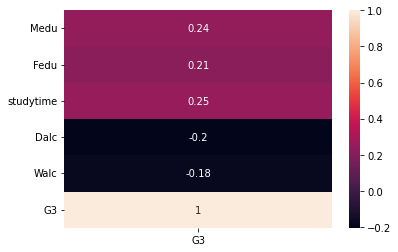

In [9]:
sns.heatmap(df.drop(['age', 'traveltime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2'], axis=1).corr()[['G3']], annot=True)

In [10]:
total_female = df.sex.value_counts()["F"]
total_male = df.sex.value_counts()["M"]
print("# Female Students:", total_female)
print("# Male Students:", total_male)

# Female Students: 383
# Male Students: 266


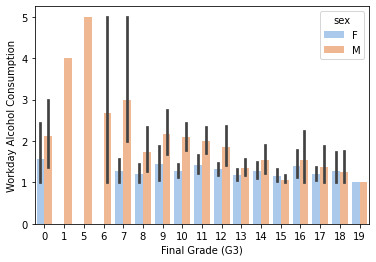

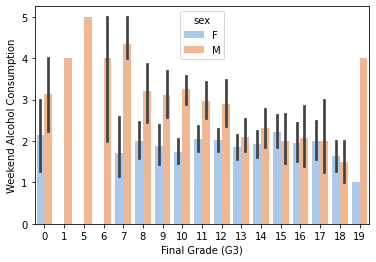

In [11]:
sns.barplot (x = 'G3', y = 'Dalc', data=df, hue = 'sex', palette='pastel')
plt.xlabel ('Final Grade (G3)')
plt.ylabel ('Workday Alcohol Consumption')
plt.show()

sns.barplot (x = 'G3', y = 'Walc', data=df, hue = 'sex', palette='pastel')
plt.xlabel ('Final Grade (G3)')
plt.ylabel ('Weekend Alcohol Consumption')
plt.show()

**Observations**
* Students who consume more alcohol have lower grades (0-10 range)
* Male students whose grade is 19 consume more alcohol on weekends than weekdays
* Overall, male students consume more alcohol than female students

In [12]:
# distribution of final grades
values = df['G3'].value_counts().tolist()
names = list(dict(df['G3'].value_counts()).keys())
px.pie(df, values=values, names=names, hole = 0.5)

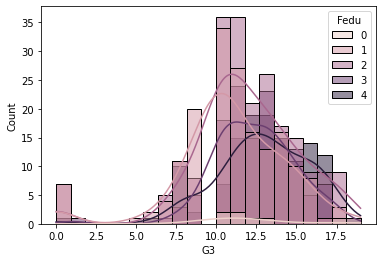

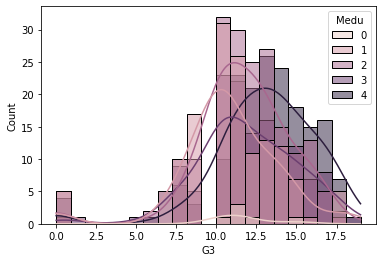

In [13]:
sns.histplot (x='G3', data=df, hue='Fedu', kde=True)
plt.show()

sns.histplot (x='G3', data=df, hue='Medu', kde=True)
plt.show()

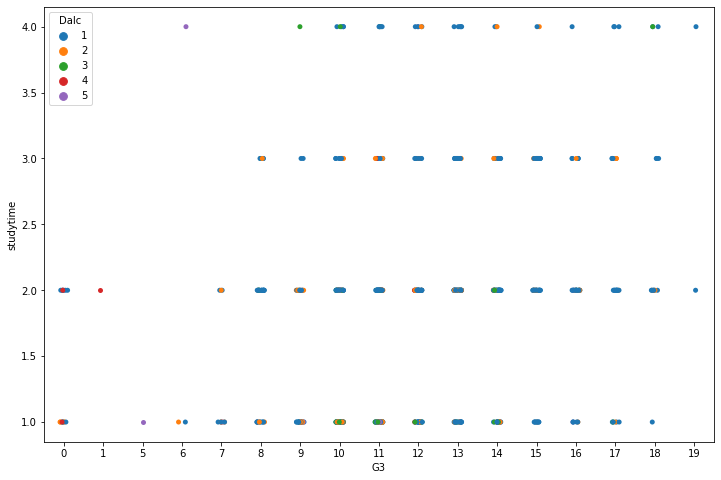

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
sns.stripplot (x="G3", y="studytime", data=df, hue="Dalc")
plt.show()

<AxesSubplot:xlabel='Dalc', ylabel='goout'>

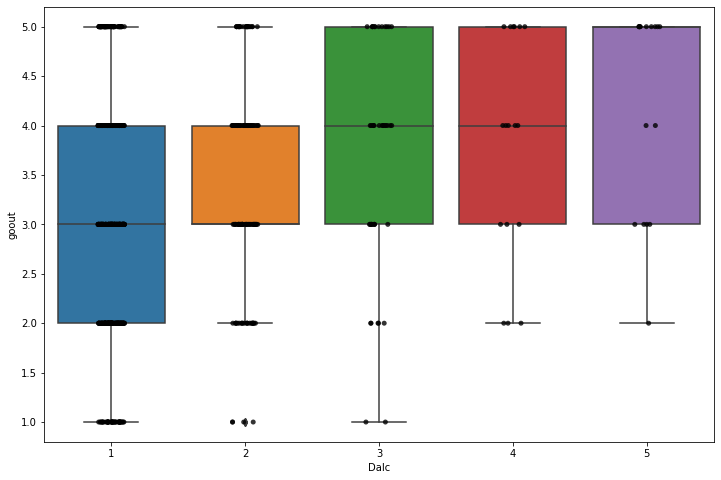

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
sns.stripplot (data=df, x="Dalc", y="goout", color="black", alpha=0.8)
sns.boxplot (data=df, x="Dalc", y="goout")

Students who consume more alcohol (workday) have a higher median rate of going out with friends.

# Building a Model

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [17]:
feature_names = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
X = df[feature_names]
y = df.G3

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
LinearRegressionScore = lr.score(X,y)
print("Accuracy obtained by Linear Regression model:",LinearRegressionScore*100)

Accuracy obtained by Linear Regression model: 25.551725076491817


In [19]:
# Decision Tree
train_X, val_X, train_y, val_y = train_test_split (X, y, random_state = 1)
model = DecisionTreeRegressor(random_state=1)
model.fit (train_X, train_y)
val_predictions = model.predict (val_X)

val_mae = mean_absolute_error (val_y, val_predictions)
print("Mean Absolute Error:", val_mae)

# fit model
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

final_model = DecisionTreeRegressor(max_leaf_nodes=99, random_state=1)
final_model.fit (X, y) # fit with all data

DecisionTreeScore = final_model.score (X, y)
print (DecisionTreeScore*100)

Mean Absolute Error: 3.1411042944785277
77.82273605967153


In [20]:
# Random Forest
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
pred = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(val_y, pred)
print ("Mean Absolute Error:", rf_val_mae)

RandomForestClassifierScore = rf_model.score(train_X, train_y)
print (RandomForestClassifierScore*100)

Mean Absolute Error: 2.409357873210634
90.09324245531384


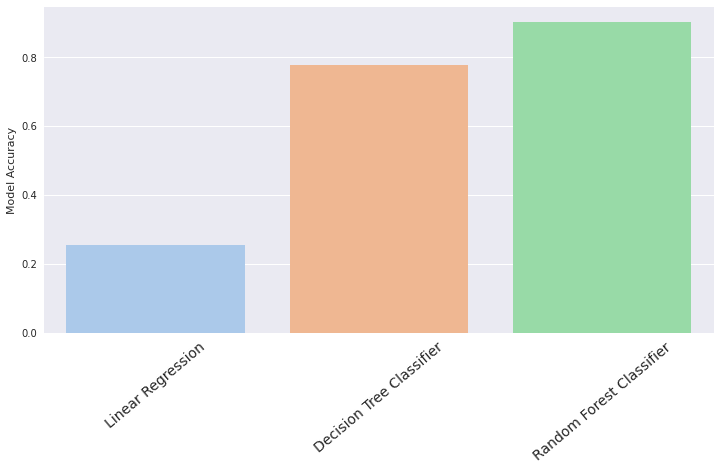

In [21]:
plt.style.use("seaborn")

x = ["Linear Regression", 
     "Decision Tree Classifier", 
     "Random Forest Classifier"]

y = [LinearRegressionScore, 
     DecisionTreeScore, 
     RandomForestClassifierScore]

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=x,y=y, palette="pastel")
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40, fontsize=14)
plt.show()

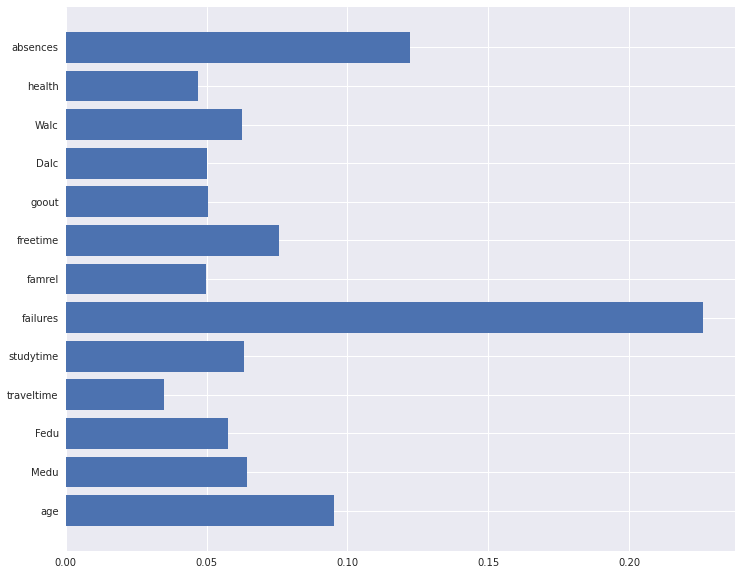

In [22]:
fig = plt.figure(figsize=(12,10))
plt.barh(X.columns, rf_model.feature_importances_)
plt.show()